In [125]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

In [126]:
df = pd.read_csv("C:/Users/Abhi/Downloads/homeprices.csv")

In [127]:
df.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [128]:
y_df = df['price']
x_df = df.drop(['price'] , axis = 1)

In [129]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(x_df)
scaled_y = sy.fit_transform(y_df.values.reshape(df.shape[0],1))    # Reshaped into a 2d Array ...to fit and tranform we need a 2d array

In [130]:
scaled_x

array([[0.        , 0.        , 0.54545455],
       [0.26666667, 0.33333333, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.        , 1.        ],
       [0.93333333, 0.66666667, 0.        ],
       [1.        , 1.        , 0.        ]])

In [131]:
df.shape[0]

6

In [132]:
scaled_y = scaled_y.reshape(df.shape[0] ,)

In [133]:
scaled_y

array([0.        , 0.05769231, 0.23076923, 0.17307692, 0.80769231,
       1.        ])

In [134]:
scaled_x.shape   # No.of Features

(6, 3)

In [135]:
from sklearn.model_selection import  train_test_split

In [136]:
# X_train , X_test , y_train , y_test  = train_test_split(scaled_x , scaled_y , test_size = 0.2 , random_state = 10)

In [149]:
import random

epochs : 500 w =  [0.94664508 0.99280627 0.95088737]  bias = -0.8859362859362861


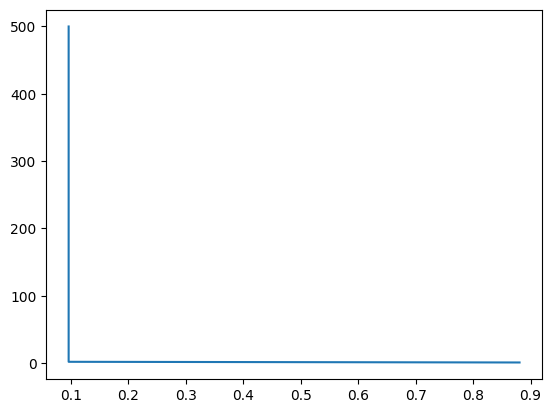

In [138]:
total_features = scaled_x.shape[1]

bias = 0

epochs = 500

learning_rate = 0.5

cost = []

epoch_list = []

for i in range(epochs):
    
    n = scaled_x.shape[0]

    w = np.ones(shape=(total_features))

    


    y_predicted  = np.dot(w , scaled_x.T) + bias
    
    w_d = -(2/n)*np.dot(scaled_x.T , (scaled_y - y_predicted))
    
    bias_d = (-2/n) * np.sum(scaled_y - y_predicted)
    
    w = w -  learning_rate * w_d
    
    bias -= learning_rate * bias_d

    cost_function = np.mean(np.square(scaled_y - y_predicted))

    cost.append(cost_function)

    epoch_list.append(i+1)
    
     


print(f'epochs : {i+1} w =  {w}  bias = {bias}')
plt.plot(cost , epoch_list)





In [144]:
def predict(area , bedrooms , age , w , bias):
    scaled_X = sx.transform([[area, bedrooms , age ]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + w[2] * scaled_X[2] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,3,	20,w,bias)
    

C:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


454509.68361298944

In [146]:
# Stochastic_Gradient_Descent

500 [0.99968752 0.9996094  0.99962716] -0.8546305402119698


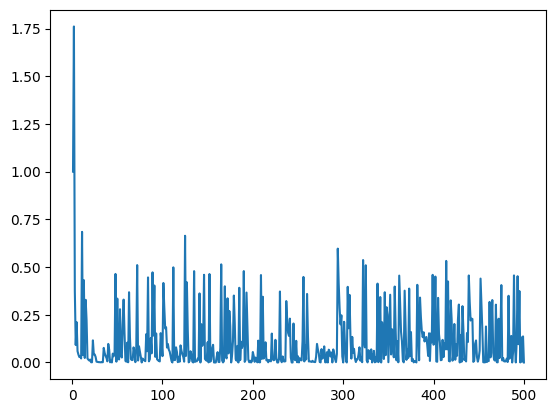

In [154]:
total_features = scaled_x.shape[1]

bias = 0

epochs = 500

learning_rate = 0.5

n = scaled_x.shape[0]


cost = []

epoch_list = []

for i in range(epochs):
    

    w = np.ones(shape=(total_features))

    random_index = random.randint(0 , n-1)

    x_scaled = scaled_x[random_index]

    y_scaled = scaled_y[random_index]


    y_predicted  = np.dot(w , x_scaled.T) + bias
    
    w_d = -(2/n)*np.dot(x_scaled.T , (y_scaled - y_predicted))
    
    bias_d = (-2/n) * np.sum(y_scaled - y_predicted)
    
    w = w -  learning_rate * w_d
    
    bias -= learning_rate * bias_d

    cost_function = np.mean(np.square(y_scaled - y_predicted))

    cost.append(cost_function)

    epoch_list.append(i+1)

print( i+1  , w , bias)

plt.plot(epoch_list , cost)
    

In [152]:
def predict(area , bedrooms , age , w , bias):
    scaled_X = sx.transform([[area, bedrooms , age ]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + w[2] * scaled_X[2] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,3,	20,w,bias)
    

C:\Users\Abhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


470744.16088600626

In [ ]:
# 454509.68361298944 for the values predict(2600,3,	20,w,bias)  ....

# 470744.16088600626   for the values predict(2600,3,	20,w,bias)

# where true value for the given variables = 550000.